# Bank Churn Modelling
- Identify and visualize which factors contribute to customer churn:

- Build a prediction model that will perform the following:
    - Classify if a customer is going to churn or not
    - Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read the data frame
df = pd.read_csv('C:/Users/acer/Desktop/Python Classnotes/Python Part3/Deep Learning/Day 1/Bank_Churn_Modelling.csv',
                 header=0,na_values='?')
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [7]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [8]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Get unique count for each variable
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Exploratory Data Analysis
Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

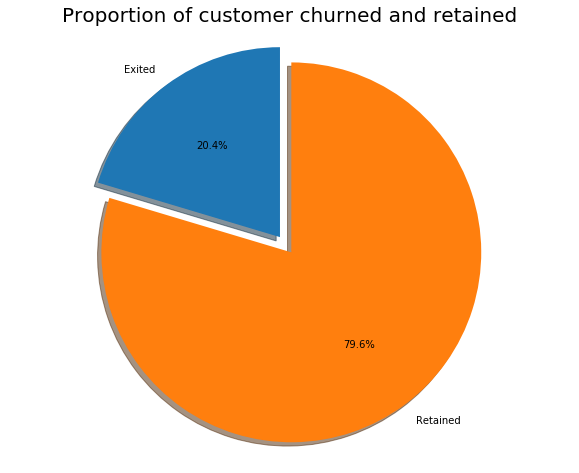

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

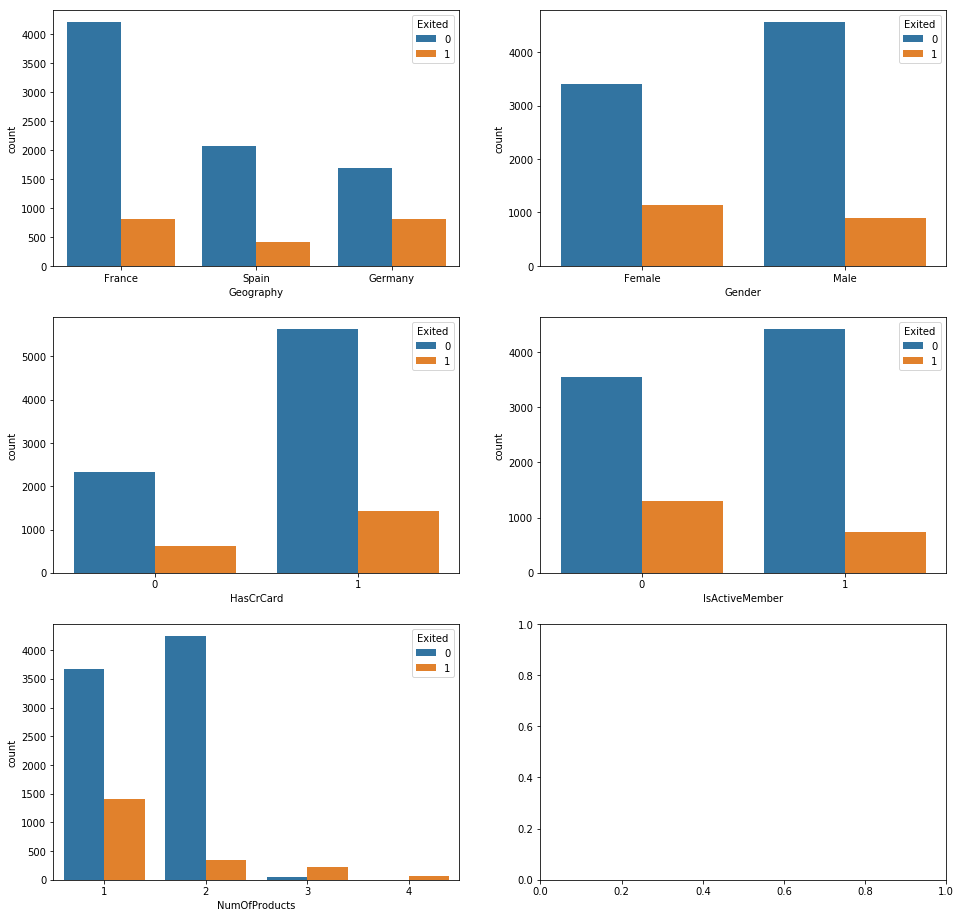

In [29]:
  # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(16, 16))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=axarr[2][0])

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


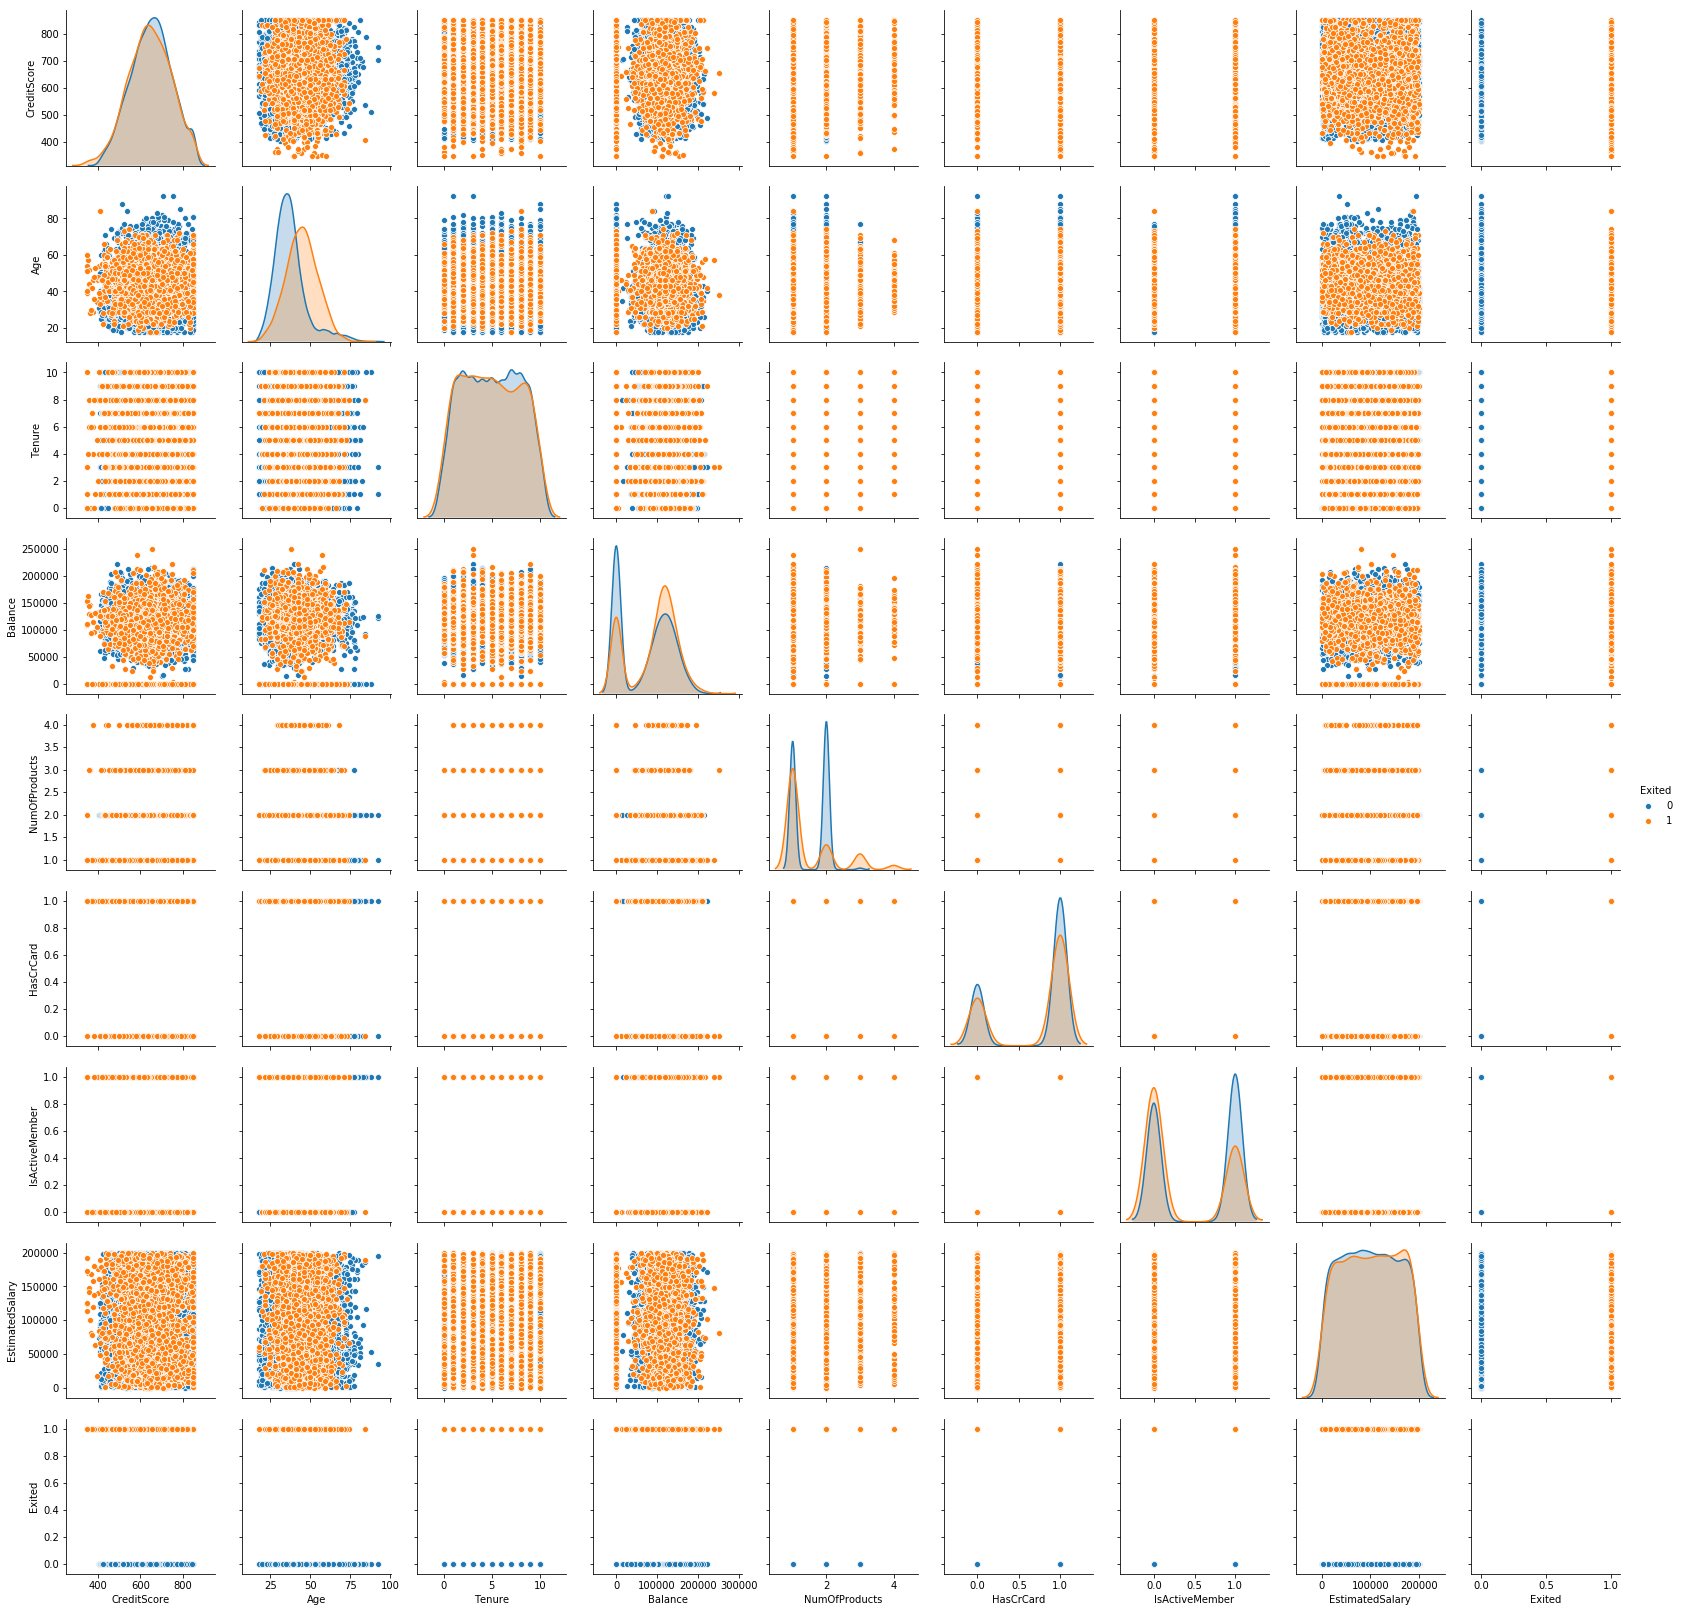

In [17]:
sns.pairplot(data=df,hue = 'Exited')

In [39]:
#Geography Breakup
df[df.Exited==1].Geography.value_counts()/df.Geography.value_counts()

France     0.161548
Germany    0.324432
Spain      0.166734
Name: Geography, dtype: float64

In [40]:
#Gender Breakup
df[df.Exited==1].Gender.value_counts()/df.Gender.value_counts()

Female    0.250715
Male      0.164559
Name: Gender, dtype: float64

In [41]:
#HasCreditCard Breakup
df[df.Exited==1].HasCrCard.value_counts()/df.HasCrCard.value_counts()

1    0.201843
0    0.208149
Name: HasCrCard, dtype: float64

In [42]:
#IsActiveMember Breakup
df[df.Exited==1].IsActiveMember.value_counts()/df.IsActiveMember.value_counts()

0    0.268509
1    0.142691
Name: IsActiveMember, dtype: float64

In [43]:
#NumOfProducts Breakup
df[df.Exited==1].NumOfProducts.value_counts()/df.NumOfProducts.value_counts()

1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: NumOfProducts, dtype: float64

#### We note the following:
- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
    - Around 32% of Germany customers have churned whereas 16% from Spain and France 
- The proportion of female customers churning(25%) is also greater than that of male customers(16%)
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
    - Both churned equally 20%
- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.
- Members with 2 products are least churning; Members with 3 or 4 products are real churner

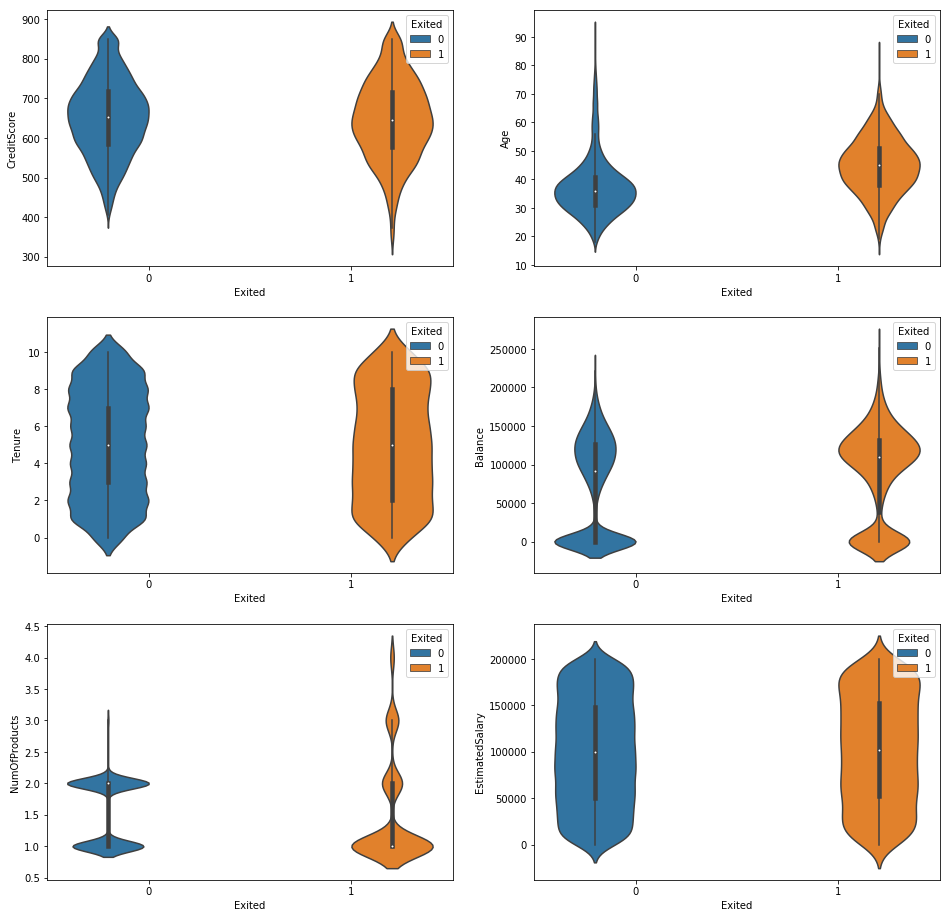

In [46]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(16, 16))
sns.violinplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.violinplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.violinplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.violinplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.violinplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.violinplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

#### We note the following:
- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
- With regard to the tenure, observed no significant likelihood to churn
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- As discussed earlier people with more than 2 products are more likely to churn
- The salary has no a significant effect on the likelihood to churn.

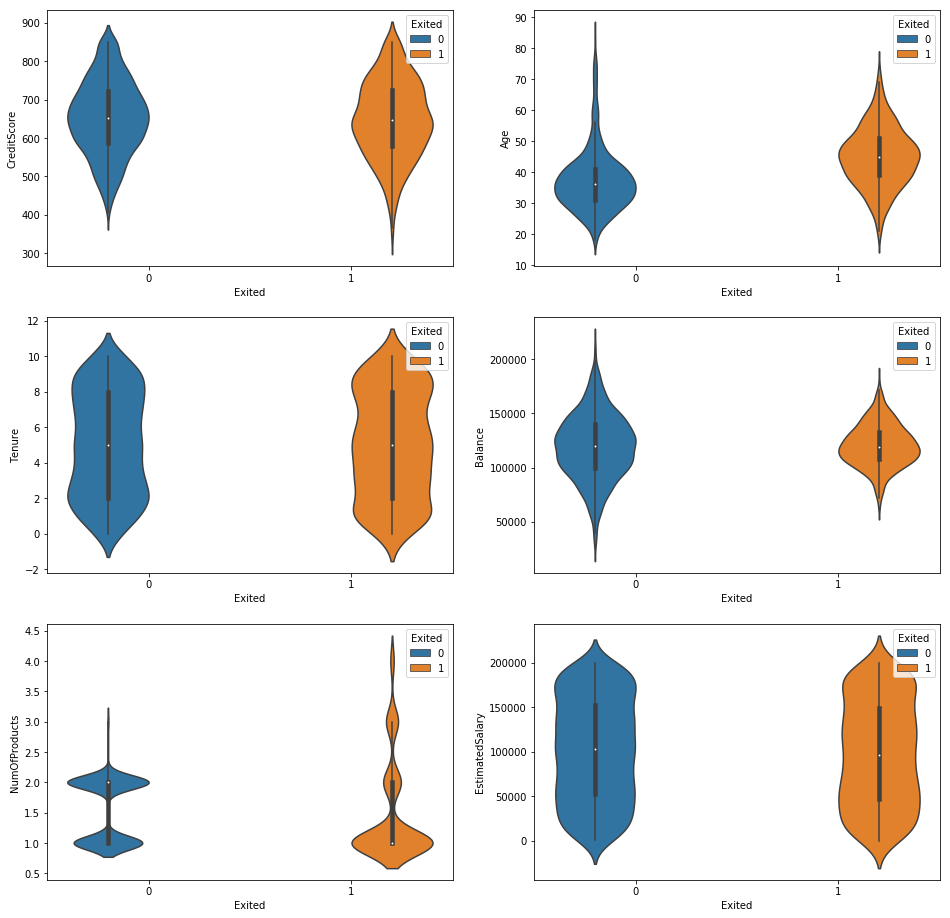

In [47]:
 # Relations based on the continuous data attributes for German Customers
fig, axarr = plt.subplots(3, 2, figsize=(16, 16))
sns.violinplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'], ax=axarr[0][0])
sns.violinplot(y='Age',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'] , ax=axarr[0][1])
sns.violinplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'], ax=axarr[1][0])
sns.violinplot(y='Balance',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'], ax=axarr[1][1])
sns.violinplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'], ax=axarr[2][0])
sns.violinplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df[df.Geography=='Germany'], ax=axarr[2][1])

In Germany we Observed significant change in Balance chart, where all churners have significant balance in their acc before churning which is real issue for the bank
Other charts are quite similar to overall

### Feature Engineering

In [8]:
X=df.drop(['Exited'],axis=1)
y=df.iloc[:, 10]

In [9]:
# One hot encode the categorical variables
X=pd.get_dummies(X,columns=['Geography','Gender','NumOfProducts'],drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,1,0,0,0,0
2,502,42,8,159660.80,1,0,113931.57,0,0,0,0,1,0
3,699,39,1,0.00,0,0,93826.63,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0,0


In [10]:
X.describe()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700,0.459000,0.026600,0.006000
std,96.653299,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932,0.498341,0.160919,0.077231
min,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [12]:
X[continuous_vars].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


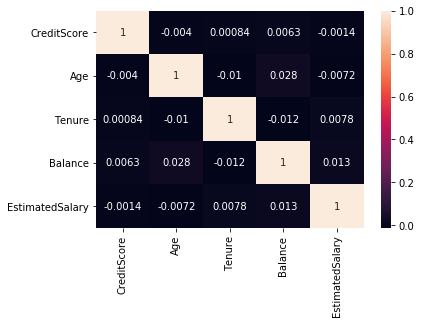

In [13]:
#Corr plot
sns.heatmap(X[continuous_vars].corr(), annot= True)
#No correlation found

C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


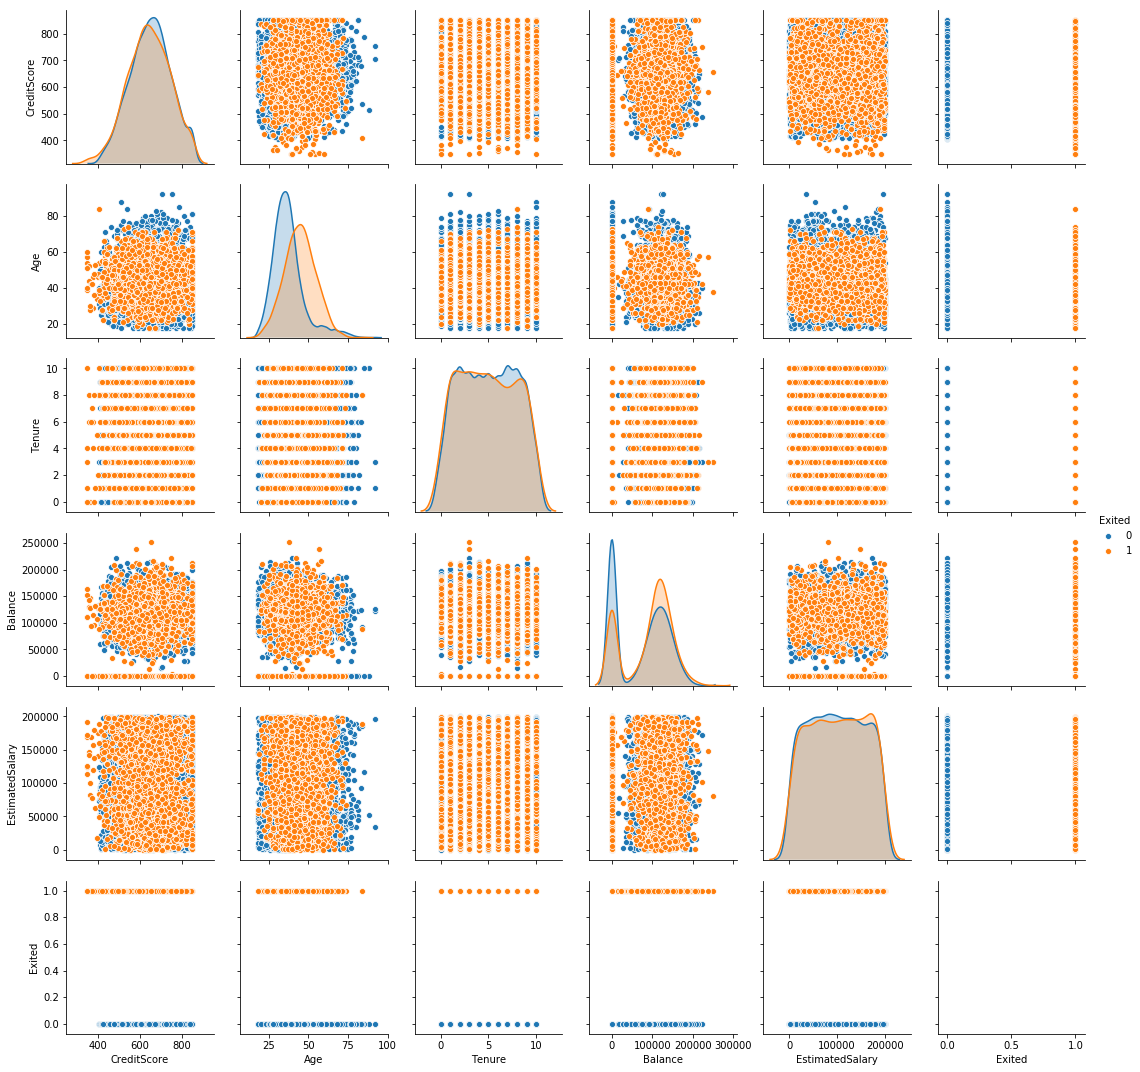

In [18]:
sns.pairplot(df[continuous_vars+['Exited']],hue='Exited')

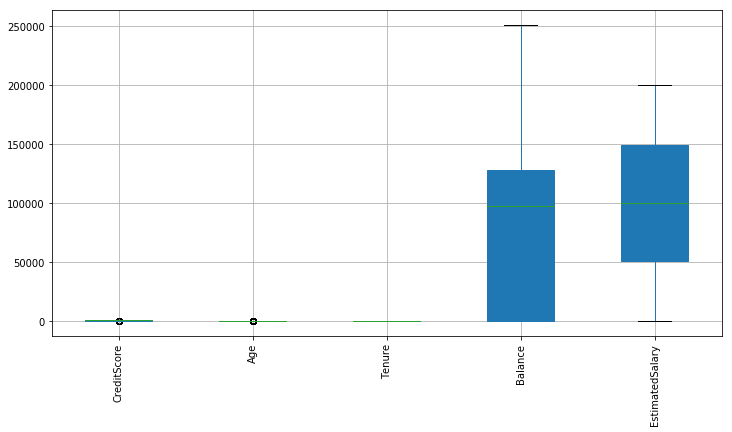

In [24]:
plt.figure(figsize=(12,6))
bplot = X[continuous_vars].boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

In [25]:
# minMax scaling the continuous variables
minVec = X[continuous_vars].min().copy()
maxVec = X[continuous_vars].max().copy()
X[continuous_vars] = (X[continuous_vars]-minVec)/(maxVec-minVec)
X.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.2,0.000000,1,1,0.506735,0,0,0,0,0,0
1,0.516,0.310811,0.1,0.334031,0,1,0.562709,0,1,0,0,0,0
2,0.304,0.324324,0.8,0.636357,1,0,0.569654,0,0,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0,0,0.469120,0,0,0,1,0,0
4,1.000,0.337838,0.2,0.500246,1,1,0.395400,0,1,0,0,0,0


### 6. Model fitting and selection
- Logistic regression 
- SVM in the primal and with different Kernels
- Ensemble models

In [26]:
#Splitting data in test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=143)

In [37]:
#Building Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# Scoring functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ( average_precision_score, roc_auc_score,precision_score)

In [28]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('XGBoost', XGBClassifier()))
models.append(('RandomForest', RandomForestClassifier()))

In [29]:
#Training model
for name, model in models:
    print('\n++++++++++++++ {} ++++++++++++++\n'.format(name))

    # Train model
    print('\n--- Training model using {} ---'.format(name))
    model.fit(X_train, y_train)
    print('=== DONE ===\n')
    
    # Make predictions on the test-set
    y_pred = model.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred)
    print('\n', report, '\n')
    
    # Confusion Matrix
    print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
    
    print('Accuracy Score: ', accuracy_score(y_test,y_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test,y_pred))
    
    print('======================================\n')


++++++++++++++ LogisticRegression ++++++++++++++


--- Training model using LogisticRegression ---


C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=== DONE ===


               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.40      0.51       393

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000
 

Conf Matrix: 
 [[1544   63]
 [ 237  156]]
Accuracy Score:  0.85
ROC AUC Score:  0.6788715400656479


++++++++++++++ XGBoost ++++++++++++++


--- Training model using XGBoost ---
=== DONE ===


               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1607
           1       0.79      0.49      0.60       393

   micro avg       0.87      0.87      0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000
 

Conf Matrix: 
 [[1557   50]
 [ 201  192]]
Accuracy Score:  0.8745
ROC AUC Score:  0.7287178707657813


++++++++++++++ RandomForest +

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== DONE ===


               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000
 

Conf Matrix: 
 [[1541   66]
 [ 208  185]]
Accuracy Score:  0.863
ROC AUC Score:  0.7148337980622309



In [35]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [39]:
y_pred = clf.predict(X_test)
print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
# Classification report
report = classification_report(y_test, y_pred)
print('\n', report, '\n')
print("Accuracy:", accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test,y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Conf Matrix: 
 [[1557   50]
 [ 201  192]]

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1607
           1       0.79      0.49      0.60       393

   micro avg       0.87      0.87      0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.87      0.87      0.86      2000
 

Accuracy: 0.8745
ROC AUC Score:  0.7287178707657813
Precision Score: 0.7933884297520661
Area under precision (AUC) Recall: 0.48810961453536056


## Lets build ANN (Artificial Neural Network)

In [42]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow import keras

#from keras.layers import LeakyReLU,PReLU,ELU
#from keras.layers import Dropout

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
# Initialising the ANN
classifier = Sequential()
classifier

In [85]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu',input_dim = len(X_train.keys())))

In [86]:
# Adding the second hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))

In [87]:
# Adding the second hidden layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [88]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [90]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 459us/sample - loss: 0.4790 - acc: 0.7765 - val_loss: 0.4241 - val_acc: 0.8035
Epoch 2/100
5359/5359 [==============================] - 2s 327us/sample - loss: 0.4162 - acc: 0.8192 - val_loss: 0.4011 - val_acc: 0.8266
Epoch 3/100
5359/5359 [==============================] - 2s 336us/sample - loss: 0.4005 - acc: 0.8306 - val_loss: 0.3897 - val_acc: 0.8364
Epoch 4/100
5359/5359 [==============================] - 2s 299us/sample - loss: 0.3918 - acc: 0.8341 - val_loss: 0.3868 - val_acc: 0.8379
Epoch 5/100
5359/5359 [==============================] - 2s 341us/sample - loss: 0.3849 - acc: 0.8380 - val_loss: 0.3771 - val_acc: 0.8417
Epoch 6/100
5359/5359 [==============================] - 2s 352us/sample - loss: 0.3807 - acc: 0.8393 - val_loss: 0.3772 - val_acc: 0.8436
Epoch 7/100
5359/5359 [==============================] - 2s 331us/sample - loss: 0.3766 - acc: 0.8412 - val_loss: 0.37

5359/5359 [==============================] - 2s 391us/sample - loss: 0.3262 - acc: 0.8617 - val_loss: 0.3653 - val_acc: 0.8489
Epoch 60/100
5359/5359 [==============================] - 2s 373us/sample - loss: 0.3248 - acc: 0.8634 - val_loss: 0.3673 - val_acc: 0.8535
Epoch 61/100
5359/5359 [==============================] - 2s 355us/sample - loss: 0.3244 - acc: 0.8636 - val_loss: 0.3640 - val_acc: 0.8451
Epoch 62/100
5359/5359 [==============================] - 2s 336us/sample - loss: 0.3243 - acc: 0.8627 - val_loss: 0.3679 - val_acc: 0.8535
Epoch 63/100
5359/5359 [==============================] - 2s 387us/sample - loss: 0.3238 - acc: 0.8671 - val_loss: 0.3650 - val_acc: 0.8466
Epoch 64/100
5359/5359 [==============================] - 2s 374us/sample - loss: 0.3238 - acc: 0.8640 - val_loss: 0.3651 - val_acc: 0.8478
Epoch 65/100
5359/5359 [==============================] - 2s 340us/sample - loss: 0.3216 - acc: 0.8628 - val_loss: 0.3645 - val_acc: 0.8474
Epoch 66/100
5359/5359 [=========

In [107]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


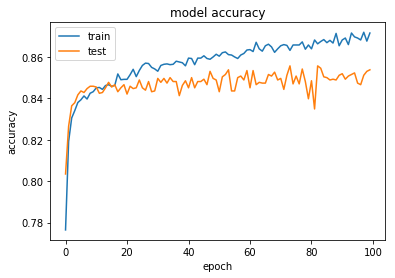

In [109]:
# summarize history for accuracy
def plot_model_accuracy(model_history):
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_model_accuracy(model_history)

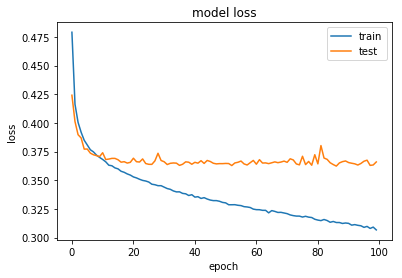

In [110]:
# summarize history for loss
def plot_model_loss(model_history):
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
plot_model_loss(model_history)

In [93]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [94]:
print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
# Classification report
report = classification_report(y_test, y_pred)
print('\n', report, '\n')
print("Accuracy:", accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test,y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Conf Matrix: 
 [[1538   69]
 [ 213  180]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000
 

Accuracy: 0.859
ROC AUC Score:  0.7075390586033431
Precision Score: 0.7228915662650602
Area under precision (AUC) Recall: 0.43759537386185965


In [96]:
# to know learning rate
from tensorflow.keras import backend
backend.eval(classifier.optimizer.lr)
#learning rate =  0.001

0.001

In [97]:
classifier.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 81us/sample - loss: 0.3447 - acc: 0.8590


[0.3446983880996704, 0.859]

In [111]:
#Build the model
def build_model():
    from tensorflow.keras import layers
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1,activation=tf.nn.sigmoid),#for classification last activation fn shd be "sigmoid"
  ])

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [112]:
model = build_model()
model_history=model.fit(X_train, y_train, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 202us/sample - loss: 0.4238 - acc: 0.8196
Epoch 2/100
8000/8000 [==============================] - 1s 128us/sample - loss: 0.3780 - acc: 0.8424
Epoch 3/100
8000/8000 [==============================] - 1s 125us/sample - loss: 0.3692 - acc: 0.8468
Epoch 4/100
8000/8000 [==============================] - 1s 125us/sample - loss: 0.3620 - acc: 0.8487
Epoch 5/100
8000/8000 [==============================] - 1s 136us/sample - loss: 0.3570 - acc: 0.8499
Epoch 6/100
8000/8000 [==============================] - 1s 127us/sample - loss: 0.3531 - acc: 0.8529
Epoch 7/100
8000/8000 [==============================] - 1s 127us/sample - loss: 0.3481 - acc: 0.8579
Epoch 8/100
8000/8000 [==============================] - 1s 126us/sample - loss: 0.3435 - acc: 0.8606
Epoch 9/100
8000/8000 [==============================] - 1s 125us/sample - loss: 0.3429 - acc: 0.8596
Epoch 10/100
8000/8000 [==============================] - 1s 128us/sample - loss: 

8000/8000 [==============================] - 2s 191us/sample - loss: 0.2428 - acc: 0.9010
Epoch 81/100
8000/8000 [==============================] - 2s 199us/sample - loss: 0.2459 - acc: 0.8997
Epoch 82/100
8000/8000 [==============================] - 1s 187us/sample - loss: 0.2390 - acc: 0.9016s - loss: 0.2398 - acc
Epoch 83/100
8000/8000 [==============================] - 2s 194us/sample - loss: 0.2392 - acc: 0.9040
Epoch 84/100
8000/8000 [==============================] - 2s 208us/sample - loss: 0.2376 - acc: 0.9018
Epoch 85/100
8000/8000 [==============================] - 2s 211us/sample - loss: 0.2382 - acc: 0.9043
Epoch 86/100
8000/8000 [==============================] - 2s 204us/sample - loss: 0.2353 - acc: 0.9036
Epoch 87/100
8000/8000 [==============================] - ETA: 0s - loss: 0.2325 - acc: 0.906 - 2s 217us/sample - loss: 0.2319 - acc: 0.9070
Epoch 88/100
8000/8000 [==============================] - 2s 208us/sample - loss: 0.2355 - acc: 0.9029
Epoch 89/100
8000/8000 [==

KeyError: 'val_loss'

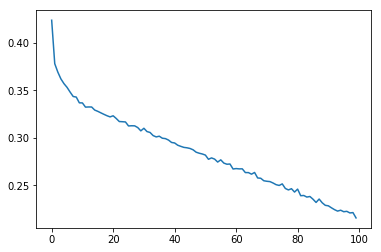

In [113]:
plot_model_loss(model_history)

KeyError: 'val_acc'

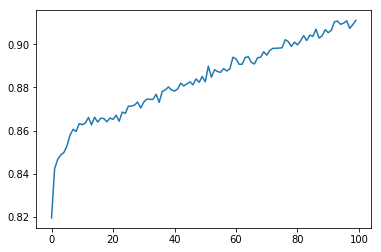

In [114]:
plot_model_accuracy(model_history)

In [124]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print('ANN Result')
print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
# Classification report
report = classification_report(y_test, y_pred)
print('\n', report, '\n')
print("Accuracy:", accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test,y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

ANN Result
Conf Matrix: 
 [[1538   69]
 [ 213  180]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000
 

Accuracy: 0.859
ROC AUC Score:  0.7075390586033431
Precision Score: 0.7228915662650602
Area under precision (AUC) Recall: 0.43759537386185965


#### Lets build Random Forest model again

In [117]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
y_pred=RF.predict(X_test)

In [123]:
# Predicting the Test set results
print('Random Forest Result')
print('Conf Matrix: \n', confusion_matrix(y_test,y_pred))
# Classification report
report = classification_report(y_test, y_pred)
print('\n', report, '\n')
print("Accuracy:", accuracy_score(y_test, y_pred))
print('ROC AUC Score: ', roc_auc_score(y_test,y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Random Forest Result
Conf Matrix: 
 [[1550   57]
 [ 202  191]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.49      0.60       393

   micro avg       0.87      0.87      0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 

Accuracy: 0.8705
ROC AUC Score:  0.7252676347595047
Precision Score: 0.7701612903225806
Area under precision (AUC) Recall: 0.4753023064926537


### Conclusion:
##### From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance than the overall accuracy score of the model.
##### Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.
##### From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the XGBoost where according to the fit on the training set, with a precision score on 1's of 0.79, out of all customers that the model thinks will churn, 79% do actually churn and with the recall score of 0.49 on the 1's, the model is able to highlight 49% of all those who churned

In [132]:
#Lets dig into feature importance
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.3449, 'Age'), (0.1525, 'NumOfProducts_2'), (0.1069, 'Balance'), (0.1, 'NumOfProducts_3'), (0.0892, 'IsActiveMember'), (0.0502, 'Geography_Germany'), (0.0452, 'CreditScore'), (0.0439, 'EstimatedSalary'), (0.0229, 'NumOfProducts_4'), (0.0224, 'Tenure'), (0.0115, 'Gender_Male'), (0.0053, 'Geography_Spain'), (0.0051, 'HasCrCard')]


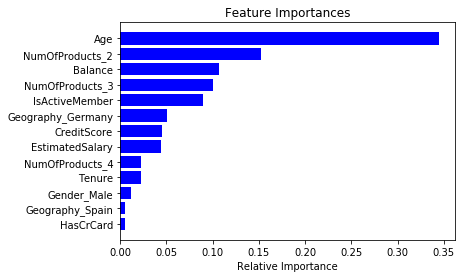

In [142]:
features = X.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [140]:
from xgboost import plot_tree
# plot single tree
#plot_tree(clf)
#plt.show()

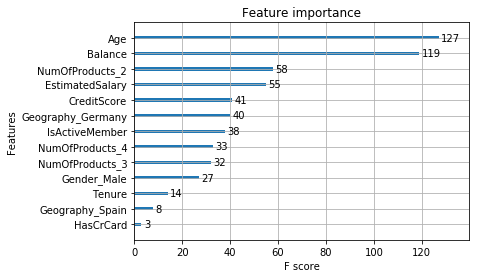

In [137]:
import xgboost as xgb
xgb.plot_importance(clf)

In [141]:
#xgb.plot_tree(clf, num_trees=0, rankdir='LR')
#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)

In [145]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator = RF.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = 'Exited',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [147]:
# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')